In [21]:
# First attempts at getting a range-doppler map of collected hdf5 data

import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift # Might not need this
from radar_ffts import range_doppler_fft, range_doppler_sum

def range_doppler_map(hdf5_file_path, frame):
    
    frame_data = hdf5_file_path[f'Sensors/TI_Radar/Data/Frame_{frame}/frame_data'] # Collect the data of a specific frame, idk just fucking figure it out
    #print(frame_data[0,:,0]) # data is stored as samples x chirps x channels
    range_pad = 0
    doppler_pad = 0

    fftd_frame_data = range_doppler_fft(frame_data, range_pad, doppler_pad)

    plotted_fftd_frame_data = range_doppler_sum(fftd_frame_data)
    plt.figure()
    plt.imshow(plotted_fftd_frame_data, aspect='auto', cmap='jet')
    plt.title('Range-Doppler Map')
    plt.xlabel('Doppler')
    plt.ylabel('Range')
    plt.colorbar(label='Power (dB)')

    # Get current y-ticks and labels
    y_ticks = plt.gca().get_yticks()
    # Set the y-tick labels in reverse order
    plt.gca().set_yticklabels(y_ticks[::-1])

    plt.show()

C:\Users\harry\AppData\Local\Temp\ipykernel_3584\640247393.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_ticks[::-1])


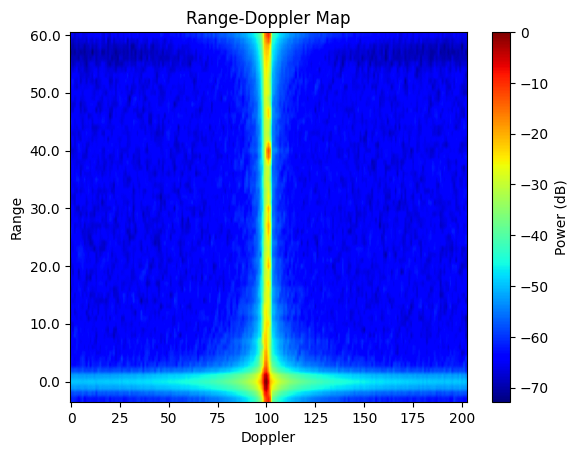

C:\Users\harry\AppData\Local\Temp\ipykernel_3584\640247393.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_ticks[::-1])


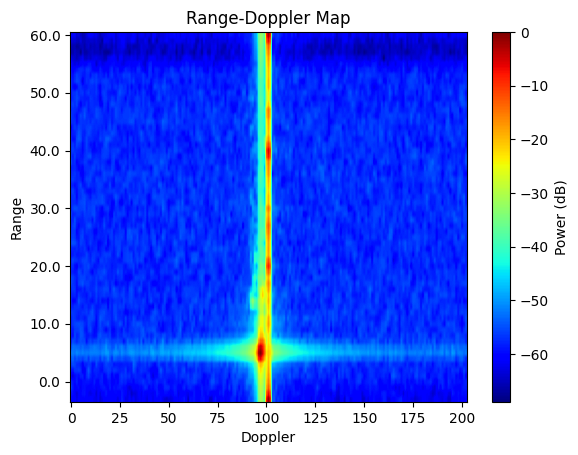

In [22]:
f = h5py.File('../4022S_data/undergrad_testset/Experiment_moving_target_back_data.hdf5', 'r') # Read in the file
range_doppler_map(f, '1')
range_doppler_map(f, '100')

C:\Users\harry\AppData\Local\Temp\ipykernel_3584\640247393.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_ticks[::-1])


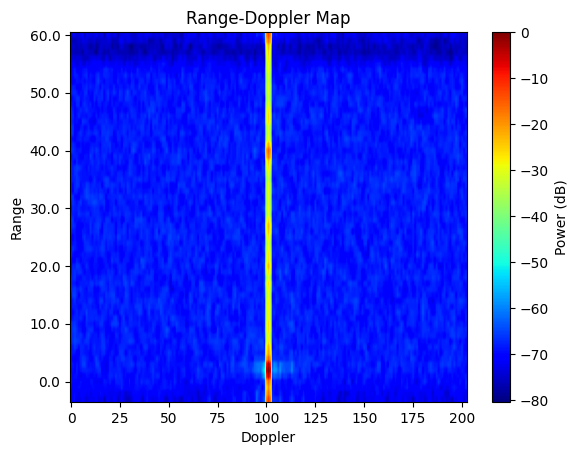

In [26]:
f = h5py.File('../4022S_data/undergrad_testset/Experiment_stationary_target_1m_1_data.hdf5','r')
range_doppler_map(f,'50')


C:\Users\harry\AppData\Local\Temp\ipykernel_3584\640247393.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_ticks[::-1])


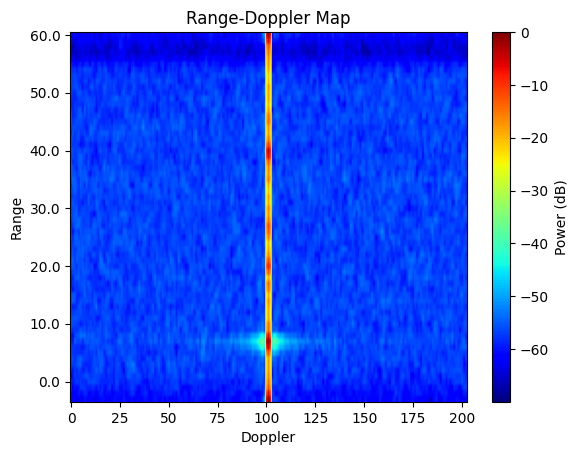

In [25]:
f = h5py.File('../4022S_data/undergrad_testset/Experiment_stationary_target_2m_1_data.hdf5','r')
range_doppler_map(f,'50')


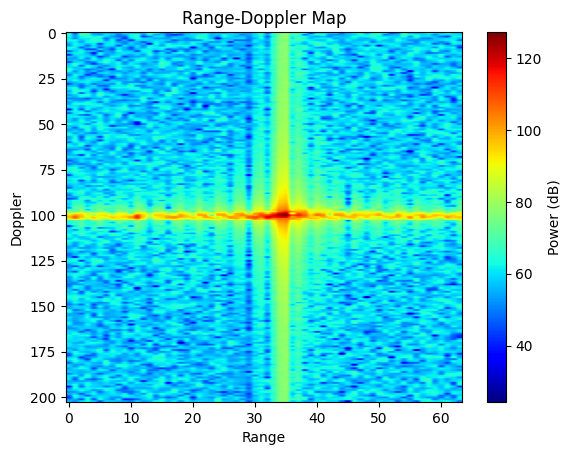

In [12]:
# Trying a homemade range-doppler map - can ignore this
target_frame = 'Sensors/TI_Radar/Data/Frame_0'
frame_data = f[f'{target_frame}/frame_data']#[:,:,0]

window = np.tile(np.hanning(frame_data.shape[1])[np.newaxis, :, np.newaxis], (frame_data.shape[0], 1, frame_data.shape[2]))

after_fast_time_fft = fft(window[:,:,0]*frame_data[:,:,0],frame_data.shape[0],0)
after_slow_time_fft = fftshift(fft(after_fast_time_fft, after_fast_time_fft.shape[1],1))

#Normalize to dB

plt.figure()
plt.imshow(np.rot90(20 * np.log10(np.abs(after_slow_time_fft)), 3), aspect='auto', cmap='jet')
#plt.imshow(20 * np.log10(np.abs(after_slow_time_fft)), aspect='auto', cmap='jet')
plt.title('Range-Doppler Map')
plt.xlabel('Range')
plt.ylabel('Doppler')
plt.colorbar(label='Power (dB)')
plt.show()
